<a href="https://colab.research.google.com/github/HoangLong1907/DeepLearning-CS431/blob/main/Baitap/tranfer_learning_vgg16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Mon Apr  5 02:25:23 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P8     7W /  75W |      0MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10

tf.random.set_seed(248)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
print("x_train:",x_train.shape)
print("y_train:",y_train.shape)
print("x_test:",x_test.shape)
print("y_test:",y_test.shape)

x_train: (50000, 32, 32, 3)
y_train: (50000, 1)
x_test: (10000, 32, 32, 3)
y_test: (10000, 1)


[6]


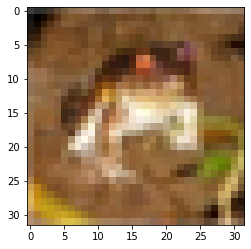

In [ ]:
import matplotlib.pyplot as plt
idx = 0                 #chạy từ 0-49999(vd: ảnh-index 0 thuoc lop [6])
print(y_train[idx])     #[6]
plt.imshow(x_train[idx])
plt.show()

Example training images and their labels: [6, 9, 9, 4, 1]
Corresponding classes for the labels: ['frog', 'truck', 'truck', 'deer', 'automobile']


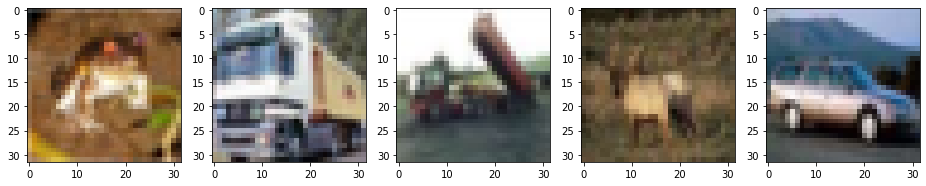

In [ ]:
cifar10_classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print('Example training images and their labels: ' + str([x[0] for x in y_train[0:5]])) 
print('Corresponding classes for the labels: ' + str([cifar10_classes[x[0]] for x in y_train[0:5]]))

f, axarr = plt.subplots(1, 5) # 1 row, 5 column to show 
f.set_size_inches(16, 6)

for i in range(5):
    img = x_train[i]
    axarr[i].imshow(img)
plt.show()


In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

In [ ]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [ ]:
y_test_oh = tf.one_hot(y_test[:,0], 10) #chuyển đổi một tập hợp các nhãn thưa thớt thành một đại diện nóng một chiều
y_train_oh = tf.one_hot(y_train[:,0], 10)

In [ ]:
y_train[idx]

array([6], dtype=uint8)

In [ ]:
y_train_oh[idx]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)>

# CNN

In [ ]:
vgg = tf.keras.applications.VGG16(include_top = False,
                                 input_shape = (32, 32, 3))

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
x = tf.zeros((8, 32, 32, 3))
y=vgg(x)

In [ ]:
y.shape

TensorShape([8, 1, 1, 512])

In [ ]:
x = tf.zeros((8, 512, 218, 256))
pool_layer = tf.keras.layers.GlobalAvgPool2D()
y = pool_layer(x)
y.shape

TensorShape([8, 256])

In [ ]:
cifar_net = tf.keras.Sequential(
    [vgg,
     tf.keras.layers.GlobalAvgPool2D(),
     tf.keras.layers.Dense(10)
     ]
)

In [ ]:
cifar_net.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total params: 14,719,818
Trainable params: 14,719,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
x = tf.zeros((8, 32, 32, 3))
y = cifar_net(x)
y.shape

TensorShape([8, 10])

In [ ]:
sgd = tf.keras.optimizers.SGD()       #Stochastic Gradient Descent 
cifar_net.compile(
    optimizer = sgd,
    loss = tf.keras.losses.MeanSquaredError()
)

In [ ]:
cifar_net.fit(x_train,
              y_train_oh,
              batch_size = 64,
              epochs=10,
              validation_data = (x_test, y_test),
              verbose=1
              )    # fit ~= training


Epoch 1/10
782/782 [==============================] - 40s 51ms/step - loss: 0.0560 - val_loss: 27.6431
Epoch 2/10
782/782 [==============================] - 40s 51ms/step - loss: 0.0486 - val_loss: 27.6724
Epoch 3/10
782/782 [==============================] - 39s 50ms/step - loss: 0.0442 - val_loss: 27.6705
Epoch 4/10
782/782 [==============================] - 39s 50ms/step - loss: 0.0411 - val_loss: 27.6576
Epoch 5/10
782/782 [==============================] - 39s 50ms/step - loss: 0.0388 - val_loss: 27.6833
Epoch 6/10
782/782 [==============================] - 39s 50ms/step - loss: 0.0369 - val_loss: 27.6644
Epoch 7/10
782/782 [==============================] - 39s 50ms/step - loss: 0.0353 - val_loss: 27.6553
Epoch 8/10
782/782 [==============================] - 39s 50ms/step - loss: 0.0340 - val_loss: 27.6714
Epoch 9/10
782/782 [==============================] - 39s 50ms/step - loss: 0.0328 - val_loss: 27.6536
Epoch 10/10
782/782 [==============================] - 39s 50ms/step - lo

In [ ]:
y_test_pred = cifar_net.predict(x_test, 64)

In [ ]:
y_test_pred.shape

(10000, 10)

In [ ]:
y_test_pred.argmax(axis=1)[0]

3

In [ ]:
y_test_oh[0]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)>

In [ ]:
acc = tf.keras.metrics.Accuracy()
acc.update_state(y_test_oh, y_test_pred)
print(acc.result().numpy())

0.0


In [ ]:
y_train_pred = cifar_net.predict(x_train, 64)
y_train_pred = y_train_pred.argmax(axis=1)
acc = tf.keras.metrics.Accuracy()
acc.update_state(y_train_pred, y_train)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=50000.0>

In [ ]:
acc.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.78922>

In [ ]:
y_test_pred = cifar_net.predict(x_test,64)
y_test_pred = y_test_pred.argmax(axis=1)
acc = tf.keras.metrics.Accuracy()
acc.update_state(y_test_pred, y_test)
acc.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.7666>

In [ ]:
np.sum(y_test_pred == y_test[:,0])/len(y_test_pred)

0.7666